In [15]:
import os
os.chdir('./..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import icd10
# from icd9cms.icd9 import search

from tqdm import tqdm

from collections import Counter

import sys
sys.path.insert(1, os.path.join(os.path.abspath('.'), '..'))

from utils.data_io import *
from utils.common import *

def legend_without_duplicate_labels(ax, fontsize=12):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), fontsize=fontsize)

In [2]:
input_table = pd.read_csv('/home/dhm/workspace/conference_projects/MICCAI2022_AKF_feature_importance/processed/DatasetOverview-Inputs-icd9code.csv', 
                          header=0, sep=',')
input_uid_dict = {uid: input_table.loc[input_table['TableUID']==uid, 'ParamNameNew'].iloc[0] 
                 for uid in input_table.loc[input_table['TableUID']<7e5, 'TableUID'].unique()}
for uid in input_table.loc[input_table['TableUID']>7e5, 'TableUID'].unique():
    input_uid_dict[uid] = input_table.loc[input_table['TableUID']==uid, 'ParamNameOrigin'].iloc[0] 
    
dsv_file_path = '/home/dhm/workspace/eicu/data/all_unit_type_structured_dsv_data_v1/'

In [3]:
# file_path = '/home/kai/workspace/data/EICU/structured_dsv_data_v1'

# pid_arf = np.load('../processed/acute_renal_failure/acute_renal_failure_cases_valid.npy')
# pid_total = np.load('../processed/patient_ids_all.npy')
# pid_arf_ = np.load('../processed/acute_renal_failure/pid_5849.npy')
# len(pid_arf_)

In [4]:
dx_5849 = [700003, 700163, 700499, 700571, 700596, 700854]

# pid_5849 = []
# for pid in pid_total:
#     data_file = os.path.join(file_path, 'data_'+str(pid)+'.dsv')
#     data = pd.read_csv(data_file, header=0, sep='$')
#     data_dx = data[data['UID']>7e5]
#     data_dx['Value'] = data_dx['Value'].astype(float)
#     for dx in dx_5849:
#         if data_dx[(data_dx['UID']==dx) & np.isclose(data_dx['Value'], 1)].shape[0] > 0:
#             pid_5849.append(pid)
#             break  
# np.save('../processed/pid_5849_from_structured_dsv', pid_5849)

pid_5849 = np.load('../processed/pid_5849_all.npy')
len(pid_5849)

19137

In [5]:
pid = pid_5849[300]
info, data = load_patient_data_dsv(dsv_file_path, pid)

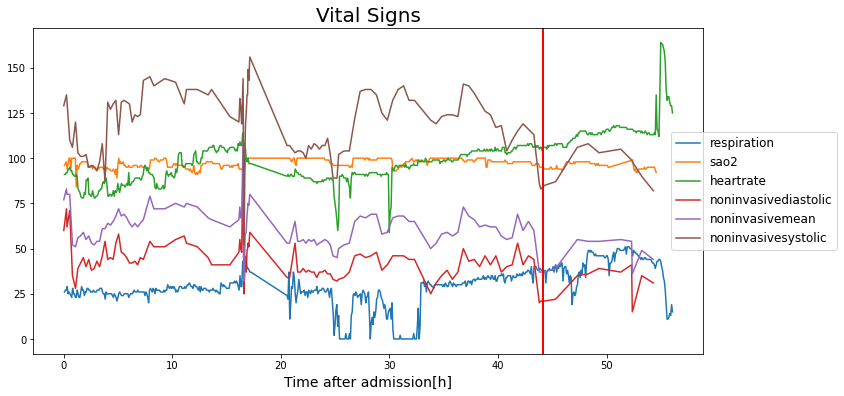

In [6]:
# Vital Data
vital_uid = data.loc[(data['UID']>1e5) & (data['UID']<3e5), 'UID']
vital_uid = vital_uid.unique()

fig, ax = plt.subplots(figsize=(12,6))
for uid in vital_uid:
    vital_data = data.loc[data['UID']==uid, 'Value'].astype(float)
    vital_ts = data.loc[data['UID']==uid, 'Offset'] / 60
    vital_label = input_uid_dict[uid]
    ax.plot(vital_ts, vital_data, label=vital_label)
    
for dx in dx_5849:
    if data.loc[data['UID']==dx].shape[0] > 0:
        dx_ts = data.loc[data['UID']==dx, 'Offset'] / 60
        for ts in dx_ts:
            ax.axvline(ts, c='r', linewidth=2)

ax.set_title('Vital Signs', fontsize=20)
ax.set_xlabel('Time after admission[h]', fontsize=14)
plt.legend(loc='center right', fontsize=12, bbox_to_anchor=(1.2, 0.5), borderaxespad=0.)

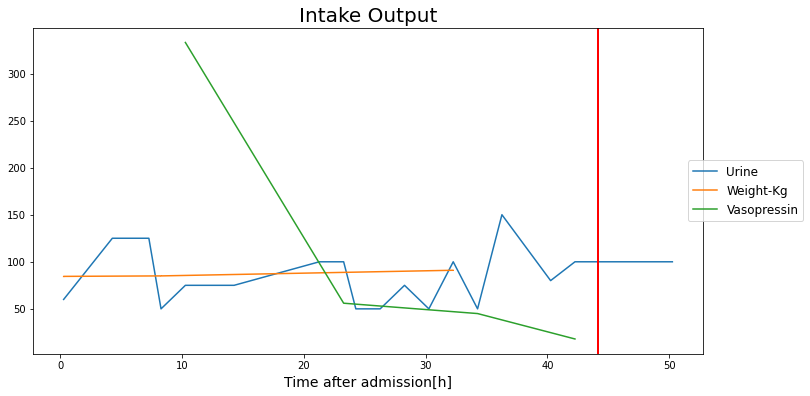

In [7]:
# Intake-Output Data
select_uid = data.loc[(data['UID']>3e5) & (data['UID']<4e5), 'UID']
select_uid = select_uid.unique()

fig, ax = plt.subplots(figsize=(12,6))
for uid in select_uid:
    select_data = data.loc[data['UID']==uid, 'Value'].astype(float)
    select_ts = data.loc[data['UID']==uid, 'Offset'] / 60
    select_label = input_uid_dict[uid]
    ax.plot(select_ts, select_data, label=select_label)
    
for dx in dx_5849:
    if data.loc[data['UID']==dx].shape[0] > 0:
        dx_ts = data.loc[data['UID']==dx, 'Offset'] / 60
        for ts in dx_ts:
            ax.axvline(ts, c='r', linewidth=2)

ax.set_title('Intake Output', fontsize=20)
ax.set_xlabel('Time after admission[h]', fontsize=14)
plt.legend(loc='center right', fontsize=12, bbox_to_anchor=(1.15, 0.5), borderaxespad=0.)

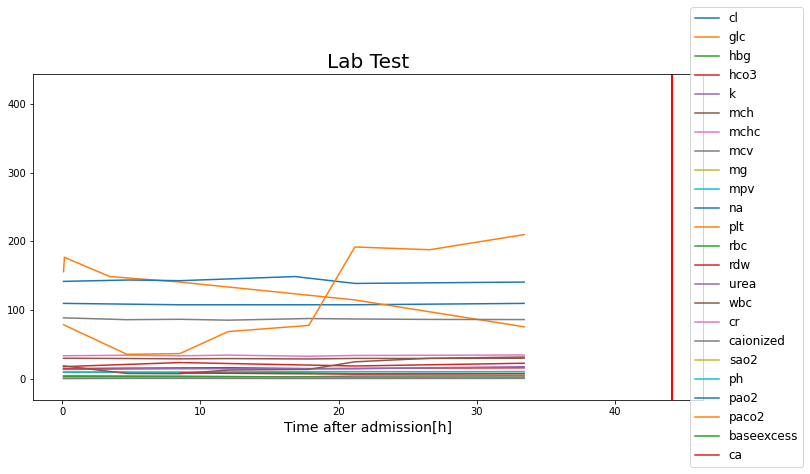

In [8]:
# Lab Data
select_uid = data.loc[(data['UID']>4e5) & (data['UID']<5e5), 'UID']
select_uid = select_uid.unique()

fig, ax = plt.subplots(figsize=(12,6))
for uid in select_uid:
    select_data = data.loc[data['UID']==uid, 'Value'].astype(float)
    select_ts = data.loc[data['UID']==uid, 'Offset'] / 60
    select_label = input_uid_dict[uid]
    ax.plot(select_ts, select_data, label=select_label)
    
for dx in dx_5849:
    if data.loc[data['UID']==dx].shape[0] > 0:
        dx_ts = data.loc[data['UID']==dx, 'Offset'] / 60
        for ts in dx_ts:
            ax.axvline(ts, c='r', linewidth=2)

ax.set_title('Lab Test', fontsize=20)
ax.set_xlabel('Time after admission[h]', fontsize=14)
plt.legend(loc='center right', fontsize=12, bbox_to_anchor=(1.15, 0.5), borderaxespad=0.)

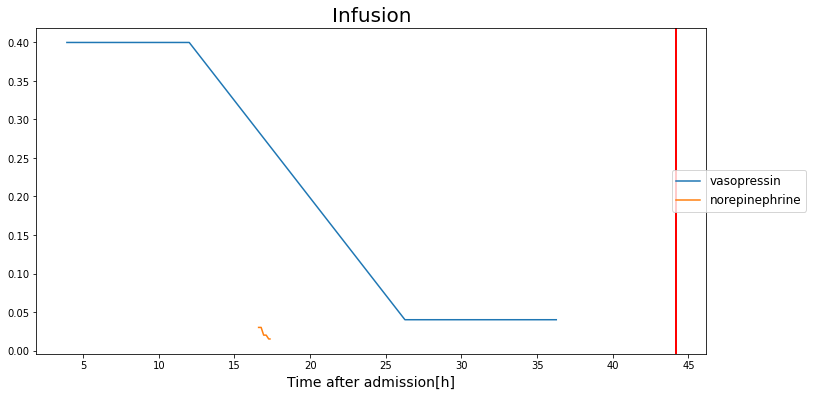

In [9]:
# Infusion Data
select_uid = data.loc[(data['UID']>5e5) & (data['UID']<6e5), 'UID']
select_uid = select_uid.unique()

fig, ax = plt.subplots(figsize=(12,6))
for uid in select_uid:
    select_data = data.loc[data['UID']==uid, 'Value'].astype(float)
    select_ts = data.loc[data['UID']==uid, 'Offset'] / 60
    select_label = input_uid_dict[uid]
    ax.plot(select_ts, select_data, label=select_label)
    
for dx in dx_5849:
    if data.loc[data['UID']==dx].shape[0] > 0:
        dx_ts = data.loc[data['UID']==dx, 'Offset'] / 60
        for ts in dx_ts:
            ax.axvline(ts, c='r', linewidth=2)

ax.set_title('Infusion', fontsize=20)
ax.set_xlabel('Time after admission[h]', fontsize=14)
plt.legend(loc='center right', fontsize=12, bbox_to_anchor=(1.15, 0.5), borderaxespad=0.)

2021-10-19 09:29:45,180: No handles with labels found to put in legend.


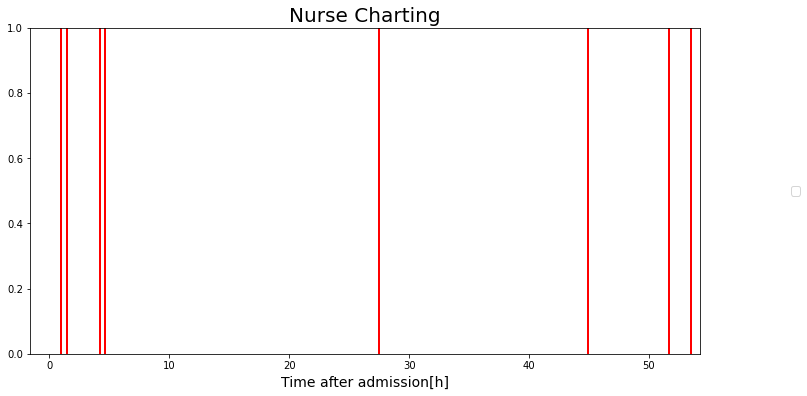

In [68]:
# Nursecharting Data
select_uid = data.loc[(data['UID']>6e5) & (data['UID']<600030), 'UID']
select_uid = select_uid.unique()

fig, ax = plt.subplots(figsize=(12,6))
for uid in select_uid:
    select_data = data.loc[data['UID']==uid, 'Value'].astype(float)
    select_ts = data.loc[data['UID']==uid, 'Offset'] / 60
    select_label = input_uid_dict[uid]
    ax.plot(select_ts, select_data, label=select_label)
    
for dx in dx_5849:
    if data.loc[data['UID']==dx].shape[0] > 0:
        dx_ts = data.loc[data['UID']==dx, 'Offset'] / 60
        for ts in dx_ts:
            ax.axvline(ts, c='r', linewidth=2)

ax.set_title('Nurse Charting', fontsize=20)
ax.set_xlabel('Time after admission[h]', fontsize=14)
plt.legend(loc='center right', fontsize=12, bbox_to_anchor=(1.15, 0.5), borderaxespad=0.)

In [10]:
info

,UID,Value
0,1,1032143
1,2,763742
2,3,Female
3,4,79
4,5,Caucasian
5,6,188
6,7,434
7,8,"Bleeding, upper GI"
8,9,154.0
9,10,21:44:00


In [77]:
icu = []
for pid in pid_5849:
    info, _ = load_patient_data_dsv(dsv_file_path, pid)
    icu.append(info.loc[info['UID']==18, 'Value'].iloc[0])

In [79]:
set(icu)

{'CCU-CTICU', 'CSICU', 'CTICU', 'Cardiac ICU'}

In [12]:
pred_n_hour = 12
input_n_hour = 12

count = 0
for pid in pid_5849:
    _, data = load_patient_data_dsv(dsv_file_path, pid)
    dx_events = data[data['UID'].isin(dx_5849)]
    dx_events_ts = dx_events.loc[(dx_events['Offset'] > (pred_n_hour+input_n_hour)*60) & (dx_events['Offset'].diff() > (pred_n_hour+input_n_hour)*60), 'Offset']
    
    count += dx_events_ts.shape[0]
count

/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


13807

In [4]:
uid_dict = load_input_uid_dict()

pred_n_hour = 12
input_n_hour = 12

count = {}
for pid in tqdm(pid_5849):
    _, data = load_patient_data_dsv(dsv_file_path, pid)
    dx_events = data[data['UID'].isin(dx_5849)]
    dx_events_ts = dx_events.loc[(dx_events['Offset'] > (pred_n_hour+input_n_hour)*60) & (dx_events['Offset'].diff() > (pred_n_hour+input_n_hour)*60), 'Offset']
    
    for di, dx_ts in enumerate(dx_events_ts):
        select_uid = data.loc[(data['UID'] > 1e5) & (data['UID'] < 5e5), 'UID']
        select_uid = select_uid.unique()
    
        for uid in select_uid:
            try:
                select_data = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Value'].astype(float)
            except:
                break
            if select_data.shape[0] == 0:
                continue
            select_ts = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Offset'] / 60
            select_label = uid_dict[uid]
            
            if select_label not in count:
                count[select_label] = 1
            else:
                count[select_label] += 1
                
count

{'heartrate': 507,
 'respiration': 457,
 'sao2': 599,
 'noninvasivediastolic': 463,
 'noninvasivemean': 463,
 'noninvasivesystolic': 463,
 'Urine': 381,
 'Weight-Kg': 199,
 'glc': 470,
 'hbg': 359,
 'mchc': 350,
 'mcv': 350,
 'mpv': 268,
 'plt': 352,
 'rbc': 351,
 'rdw': 333,
 'wbc': 351,
 'mch': 347,
 'urea': 386,
 'na': 387,
 'mg': 315,
 'k': 400,
 'cr': 386,
 'cl': 386,
 'ca': 386,
 'hco3': 397,
 'ph': 126,
 'pao2': 126,
 'paco2': 126,
 'caionized': 41,
 'baseexcess': 107,
 'systemicsystolic': 112,
 'systemicdiastolic': 112,
 'systemicmean': 112,
 'osm': 2,
 'methb': 17,
 'cohb': 15,
 'crurine': 11,
 'naurine': 11,
 'cvp': 55,
 'Magnesium': 2,
 'DialysisOut': 19,
 'o2hb': 4,
 'cardiacoutput': 5,
 'pvri': 5,
 'svr': 5,
 'svri': 5,
 'pvr': 5,
 'cardiacinput': 5,
 'Vasopressin': 1,
 'osmurine': 3,
 'Furosemide': 1}

In [16]:
uid_dict = load_input_uid_dict()
label_uid_dict = {v:k for k, v in uid_dict.items() if k < 2e5}

pred_n_hour = 12
input_n_hour = 12

count = {}
for pid in tqdm(pid_5849):
    _, data = load_patient_data_dsv(dsv_file_path, pid)
    dx_events = data[data['UID'].isin(dx_5849)]
    dx_events_ts = dx_events.loc[(dx_events['Offset'] > (pred_n_hour+input_n_hour)*60) & (dx_events['Offset'].diff() > (pred_n_hour+input_n_hour)*60), 'Offset']
    
    for di, dx_ts in enumerate(dx_events_ts):
        select_uid = data.loc[(data['UID'] > 1e5) & (data['UID'] < 2e5), 'UID']
        select_uid = select_uid.unique()
    
        for uid in select_uid:
            try:
                select_data = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Value'].astype(float)
            except:
                break
            if select_data.shape[0] == 0:
                continue
            select_ts = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Offset'] / 60
            select_label = uid_dict[uid]
            
            if select_label not in count:
                count[select_label] = 1
            else:
                count[select_label] += 1
                
count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}

selected_input = []
for k, v in count.items():
    print(f'{k} - {label_uid_dict[k]}: {v}')
    if v > 200:
        selected_input.append(label_uid_dict[k])
selected_input

/home/dhm/workspace/conference_projects/MICCAI2022_AKF_feature_importance


 28%|██▊       | 5270/19137 [00:43<01:32, 150.32it/s]/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
 50%|████▉     | 9515/19137 [01:18<01:27, 109.52it/s]/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
100%|██████████| 19137/19137 [02:52<00:00, 111.23it/s]

heartrate - 100002: 13745
sao2 - 100004: 13652
respiration - 100003: 12430
systemicmean - 100006: 4351
systemicsystolic - 100007: 4341
systemicdiastolic - 100005: 4341
cvp - 100001: 3711


[100002, 100004, 100003, 100006, 100007, 100005, 100001]

In [17]:
uid_dict = load_input_uid_dict()
label_uid_dict = {v:k for k, v in uid_dict.items() if k > 2e5 and k < 3e5}

pred_n_hour = 12
input_n_hour = 12

count = {}
for pid in pid_5849:
    _, data = load_patient_data_dsv(dsv_file_path, pid)
    dx_events = data[data['UID'].isin(dx_5849)]
    dx_events_ts = dx_events.loc[(dx_events['Offset'] > (pred_n_hour+input_n_hour)*60) & (dx_events['Offset'].diff() > (pred_n_hour+input_n_hour)*60), 'Offset']
    
    for di, dx_ts in enumerate(dx_events_ts):
        select_uid = data.loc[(data['UID'] > 2e5) & (data['UID'] < 3e5), 'UID']
        select_uid = select_uid.unique()
    
        for uid in select_uid:
            try:
                select_data = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Value'].astype(float)
            except:
                break
            if select_data.shape[0] == 0:
                continue
            select_ts = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Offset'] / 60
            select_label = uid_dict[uid]
            
            if select_label not in count:
                count[select_label] = 1
            else:
                count[select_label] += 1

count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}                

selected_input = []
for k, v in count.items():
    print(f'{k} - {label_uid_dict[k]}: {v}')
    if v > 200:
        selected_input.append(label_uid_dict[k])
selected_input

/home/dhm/workspace/conference_projects/MICCAI2022_AKF_feature_importance


/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


noninvasivemean - 200004: 12435
noninvasivediastolic - 200003: 12433
noninvasivesystolic - 200005: 12433
cardiacoutput - 200002: 188
cardiacinput - 200001: 171
svr - 200008: 170
svri - 200009: 153
pvr - 200006: 112
pvri - 200007: 110


[200004, 200003, 200005]

In [21]:
uid_dict = load_input_uid_dict()
label_uid_dict = {v:k for k, v in uid_dict.items() if k > 3e5 and k < 4e5}

pred_n_hour = 12
input_n_hour = 12

count = {}
for pid in pid_5849:
    _, data = load_patient_data_dsv(dsv_file_path, pid)
    dx_events = data[data['UID'].isin(dx_5849)]
    dx_events_ts = dx_events.loc[(dx_events['Offset'] > (pred_n_hour+input_n_hour)*60) & (dx_events['Offset'].diff() > (pred_n_hour+input_n_hour)*60), 'Offset']
    
    for di, dx_ts in enumerate(dx_events_ts):
        select_uid = data.loc[(data['UID'] > 3e5) & (data['UID'] < 4e5), 'UID']
        select_uid = select_uid.unique()
    
        for uid in select_uid:
            try:
                select_data = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Value'].astype(float)
            except:
                break
            if select_data.shape[0] == 0:
                continue
            select_ts = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Offset'] / 60
            select_label = uid_dict[uid]
            
            if select_label not in count:
                count[select_label] = 1
            else:
                count[select_label] += 1
                
count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}                

selected_input = []
for k, v in count.items():
    print(f'{k} - {label_uid_dict[k]}: {v}')
    if v > 200:
        selected_input.append(label_uid_dict[k])
selected_input

/home/dhm/workspace/conference_projects/MICCAI2022_AKF_feature_importance


/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Urine - 300017: 9122
Weight-Kg - 300019: 5235
DialysisOut - 300007: 681
Norepinephrine - 300016: 302
Vasopressin - 300018: 219
DialysisIn - 300006: 209
Magnesium - 300014: 135
Furosemide - 300012: 114
Dopamine - 300009: 84
Dobutamine - 300008: 79
Epinephrine - 300010: 45
Milrinone - 300015: 44
Esmolol - 300011: 15
Lidocaine - 300013: 6
Bumetanide - 300005: 4


[300017, 300019, 300007, 300016, 300018, 300006]

In [22]:
uid_dict = load_input_uid_dict()
label_uid_dict = {v:k for k, v in uid_dict.items() if k > 4e5 and k < 5e5}

pred_n_hour = 12
input_n_hour = 12

count = {}
for pid in pid_5849:
    _, data = load_patient_data_dsv(dsv_file_path, pid)
    dx_events = data[data['UID'].isin(dx_5849)]
    dx_events_ts = dx_events.loc[(dx_events['Offset'] > (pred_n_hour+input_n_hour)*60) & (dx_events['Offset'].diff() > (pred_n_hour+input_n_hour)*60), 'Offset']
    
    for di, dx_ts in enumerate(dx_events_ts):
        select_uid = data.loc[(data['UID'] > 4e5) & (data['UID'] < 5e5), 'UID']
        select_uid = select_uid.unique()
    
        for uid in select_uid:
            try:
                select_data = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Value'].astype(float)
            except:
                break
            if select_data.shape[0] == 0:
                continue
            select_ts = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Offset'] / 60
            select_label = uid_dict[uid]
            
            if select_label not in count:
                count[select_label] = 1
            else:
                count[select_label] += 1
                
count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}                

selected_input = []
for k, v in count.items():
    print(f'{k} - {label_uid_dict[k]}: {v}')
    if v > 200:
        selected_input.append(label_uid_dict[k])
selected_input

/home/dhm/workspace/conference_projects/MICCAI2022_AKF_feature_importance


/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


glc - 400008: 13477
k - 400012: 13161
na - 400019: 13102
cr - 400006: 13094
cl - 400004: 13082
urea - 400031: 13080
hco3 - 400011: 13064
ca - 400002: 13000
hbg - 400010: 12514
plt - 400027: 12442
wbc - 400033: 12433
rbc - 400028: 12426
mcv - 400015: 12287
mchc - 400014: 12286
mch - 400013: 11684
rdw - 400029: 11495
mg - 400017: 9077
mpv - 400018: 8144
ph - 400026: 6063
pao2 - 400025: 6061
paco2 - 400024: 6021
baseexcess - 400001: 5244
sao2 - 400030: 5126
caionized - 400003: 1665
methb - 400016: 1540
cohb - 400005: 1491
naurine - 400020: 350
crurine - 400007: 275
o2hb - 400021: 246
osm - 400022: 131
osmurine - 400023: 119
glccsf - 400009: 48
ureaurine - 400032: 3


[400008,
 400012,
 400019,
 400006,
 400004,
 400031,
 400011,
 400002,
 400010,
 400027,
 400033,
 400028,
 400015,
 400014,
 400013,
 400029,
 400017,
 400018,
 400026,
 400025,
 400024,
 400001,
 400030,
 400003,
 400016,
 400005,
 400020,
 400007,
 400021]

In [23]:
uid_dict = load_input_uid_dict()
label_uid_dict = {v:k for k, v in uid_dict.items() if k > 5e5 and k < 6e5}

pred_n_hour = 12
input_n_hour = 12

count = {}
for pid in pid_5849:
    _, data = load_patient_data_dsv(dsv_file_path, pid)
    dx_events = data[data['UID'].isin(dx_5849)]
    dx_events_ts = dx_events.loc[(dx_events['Offset'] > (pred_n_hour+input_n_hour)*60) & (dx_events['Offset'].diff() > (pred_n_hour+input_n_hour)*60), 'Offset']
    
    for di, dx_ts in enumerate(dx_events_ts):
        select_uid = data.loc[(data['UID'] > 5e5) & (data['UID'] < 6e5), 'UID']
        select_uid = select_uid.unique()
    
        for uid in select_uid:
            try:
                select_data = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Value'].astype(float)
            except:
                break
            if select_data.shape[0] == 0:
                continue
            select_ts = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Offset'] / 60
            select_label = uid_dict[uid]
            
            if select_label not in count:
                count[select_label] = 1
            else:
                count[select_label] += 1
                
count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}                

selected_input = []
for k, v in count.items():
    print(f'{k} - {label_uid_dict[k]}: {v}')
    if v > 200:
        selected_input.append(label_uid_dict[k])
selected_input

/home/dhm/workspace/conference_projects/MICCAI2022_AKF_feature_importance


/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


norepinephrine - 500014: 2281
amiodarone - 500001: 814
vasopressin - 500016: 577
furosemide - 500008: 291
dobutamine - 500004: 259
dopamine - 500005: 257
milrinone - 500011: 205
epinephrine - 500006: 175
nahco3 - 500013: 172
ca - 500003: 142
nacl - 500012: 44
esmolol - 500007: 42
lidocaine - 500009: 42
mg - 500010: 22
potassium - 500015: 1


[500014, 500001, 500016, 500008, 500004, 500005, 500011]

In [24]:
uid_dict = load_input_uid_dict()

pred_n_hour = 12
input_n_hour = 12

count = {}
for pid in pid_5849:
    _, data = load_patient_data_dsv(dsv_file_path, pid)
    dx_events = data[data['UID'].isin(dx_5849)]
    dx_events_ts = dx_events.loc[(dx_events['Offset'] > (pred_n_hour+input_n_hour)*60) & (dx_events['Offset'].diff() > (pred_n_hour+input_n_hour)*60), 'Offset']
    
    for di, dx_ts in enumerate(dx_events_ts):
        select_uid = data.loc[(data['UID'] > 6e5) & (data['UID'] < 7e5), 'UID']
        select_uid = select_uid.unique()
    
        for uid in select_uid:
            try:
                select_data = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Value'].astype(float)
            except:
                break
            if select_data.shape[0] == 0:
                continue
            select_ts = data.loc[(data['UID'] == uid) & (data['Offset']>dx_ts-(pred_n_hour+input_n_hour)*60) & (data['Offset']<dx_ts), 'Offset'] / 60
            select_label = uid_dict[uid]
            
            if select_label not in count:
                count[select_label] = 1
            else:
                count[select_label] += 1
                
count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}                
count

/home/dhm/workspace/conference_projects/MICCAI2022_AKF_feature_importance


/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/dhm/workspace/conference_projects/torch-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


{'hr': 8350,
 'rr': 8251,
 'nibps': 7465,
 'tempc': 7369,
 'nibpd': 7270,
 'spo2': 7110,
 'nibpm': 5861,
 'glc': 1863,
 'o2flow': 1497,
 'ibps': 1136,
 'ibpd': 1135,
 'ibpm': 1078,
 'cvp': 609,
 'map': 393,
 'etco2': 226,
 'temploc': 130,
 'ci': 55,
 'pad': 51,
 'pam': 51,
 'pas': 51,
 'co': 45,
 'svr': 36,
 'svo2': 34,
 'sv': 21,
 'pvr': 18,
 'svri': 6,
 'paop': 5,
 'pvri': 2,
 'o2device': 1}

In [27]:
# patient demographics
info, _ = load_patient_data_dsv(pid)

In [28]:
info

,UID,Value
0,1,1290061
1,2,977515
2,3,Male
3,4,86
4,5,Caucasian
5,6,217
6,7,517
7,8,"Effusions, pleural"
8,9,172.7
9,10,20:35:00


In [33]:
int(info.loc[info['UID']==4, 'Value'].iloc[0].replace('> ', ''))

89

In [34]:
'29'.replace('> ', '')

'29'

In [47]:
from tqdm import tqdm

uid_lab = [400008, 400012, 400011, 400019, 400031, 400006, 400004, 400002, 400010, 
           400027, 400028, 400033, 400014, 400015, 400013, 400029, 400017, 400018]

count = {}
for pid in tqdm(pid_5849):
    info, data = load_patient_data_dsv(pid)
    dx_events = data[data['UID'].isin(dx_5849)]
    dx_events_ts = dx_events.loc[(dx_events['Offset'] > (pred_n_hour+input_n_hour)*60) & (dx_events['Offset'].diff() > (pred_n_hour+input_n_hour)*60), 'Offset']
    
    for di, dx_ts in enumerate(dx_events_ts):
        for select_uid in uid_lab:
            select_uid = 300017
            vals = data.loc[data['UID']==select_uid, 'Value']
            for val in vals:
                if pd.isnull(val):
                    print(val)
                try:
                    val = float(val)
                    if val not in count:
                        count[val] = 1
                    else:
                        count[val] += 1
                except:
                    print(val)
                
count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}                
count

100%|███████████████████████████████████████████████| 318/318 [00:01<00:00, 270.63it/s]


{}

In [52]:
select_uid = [
    #Demographics
    3, 4, 23, 9,
    #VitalPeriodic
    100002, 100004, 100003,
    #VitalAperiodic
    200003, 200004, 200005,
    #Urine
    300017,
    #Lab
    400008, 400012, 400011, 400019, 400031, 400006, 400004, 400002, 400010, 400027,
    400028, 400033, 400014, 400015, 400013, 400029, 400017, 400018
]

lab_uid = [400008, 400012, 400011, 400019, 400031, 400006, 400004, 400002, 400010, 
           400027, 400028, 400033, 400014, 400015, 400013, 400029, 400017, 400018]

pid_all = np.load('../processed/patient_ids_all.npy')

pred_n_hour = 0
input_n_hour = 12

count = 0
count_valid = 0

for pid in tqdm(pid_all):
    info, data = load_patient_data_dsv(pid)
    
    dx_events = data[data['UID'].isin(dx_5849)]
    if dx_events.shape[0] > 0:
        continue
    
    ts_range = data.loc[data['UID']==100002, 'Offset'].values
    if len(ts_range) == 0:
        continue
    
    urine_ts = data.loc[data['UID']==300017, 'Offset'].unique()
    if urine_ts.shape[0] > 0:
        urine_ts = urine_ts[(urine_ts>ts_range[0]) & (urine_ts<ts_range[-1])]
    else:
        urine_ts = []
    
    lab_ts = data.loc[data['UID'].isin(lab_uid), 'Offset'].unique()
    if lab_ts.shape[0] > 0:
        lab_ts = lab_ts[(lab_ts>ts_range[0]) & (lab_ts<ts_range[-1])]
    else:
        lab_ts = []
    
    ts_cand = np.sort(np.append(urine_ts, lab_ts))
    ts_cand = [ts_cand[i] for i in range(len(ts_cand)-1) if ts_cand[i+1]-ts_cand[i] > 60*input_n_hour]
    
    
    for ts in ts_cand:
        count_feat_valid = 0
        for uid in select_uid:
            if uid < 1e5:
                select_data = info.loc[(info['UID'] == uid), 'Value'].iloc[0]
                if ~pd.isnull(select_data):
                    count_feat_valid += 1
            if uid > 1e5 and uid < 2e5:
                select_data = data.loc[(data['UID'] == uid) 
                           & (data['Offset']>ts-input_n_hour*60) 
                           & (data['Offset']<ts+pred_n_hour*60), 'Value'].astype(float)
                if select_data.shape[0] > 12*input_n_hour*0.8:
                    count_feat_valid += 1
            if uid > 2e5:
                select_data = data.loc[(data['UID'] == uid) 
                           & (data['Offset']>ts-input_n_hour*60) 
                           & (data['Offset']<ts+pred_n_hour*60), 'Value'].astype(float)
                if select_data.shape[0] > 0:
                    count_feat_valid += 1
        if count_feat_valid > 29 * 0.5:
            count_valid += 1
        count += 1
            
count, count_valid

 13%|█████▊                                      | 5803/43540 [00:44<05:09, 121.80it/s]/tmp/ipykernel_8533/1871377023.py:27: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  info, data = load_patient_data_dsv(pid)
100%|███████████████████████████████████████████| 43540/43540 [06:30<00:00, 111.50it/s]


(11273, 5460)

In [49]:
12*12

144

In [12]:
ts = data.loc[data['UID']==100002, 'Offset'].values
np.arange(ts[0], ts[-1], 12*60)

array([  10,  730, 1450, 2170, 2890, 3610])

In [15]:
lab_uid = [400008, 400012, 400011, 400019, 400031, 400006, 400004, 400002, 400010, 
           400027, 400028, 400033, 400014, 400015, 400013, 400029, 400017, 400018]

data.loc[data['UID'].isin(lab_uid), 'Offset'].unique()

array([-1197, -1195,  -732,  -537,   -66,   -63,   -55,    49,   105,
         199,   433,   776,  1197,  1361,  1458,  1462,  1761,  1983,
        2188,  2400,  2684,  2798,  2885,  2918,  3197,  3641,  3858,
        4340,  4504,  5815,  7225,  8680, 10110, 11555])

In [19]:
lab_ = data.loc[data['UID'].isin(lab_uid), 'Offset'].unique()
lab_[(lab_>ts[0]) & (lab_<ts[-1])]

array([  49,  105,  199,  433,  776, 1197, 1361, 1458, 1462, 1761, 1983,
       2188, 2400, 2684, 2798, 2885, 2918, 3197, 3641])

In [21]:
urine_ = data.loc[data['UID']==300017, 'Offset'].unique()
data.loc[data['UID'].isin(lab_uid), 'Offset'].unique()